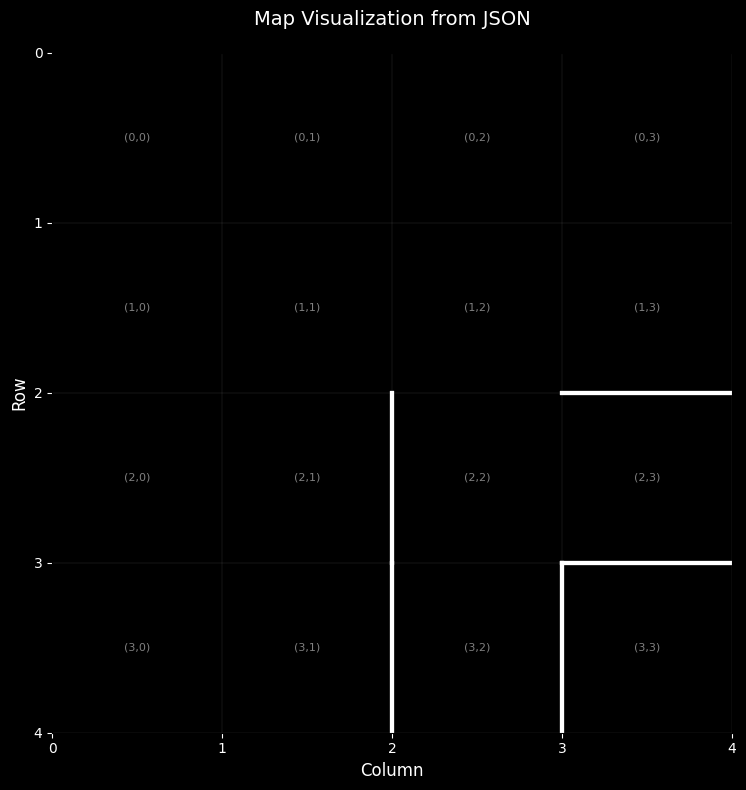

In [17]:
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from datetime import datetime

def plot_map_from_json(file_path):
    # อ่านไฟล์ JSON
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    nodes = data['nodes']
    
    max_row = max(node['coordinate']['row'] for node in nodes)
    max_col = max(node['coordinate']['col'] for node in nodes)
    grid_height = max_row +1
    grid_width = max_col +1
    
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xlim(0, grid_width)
    ax.set_ylim(0, grid_height)
    ax.set_aspect('equal')
    ax.invert_yaxis()
    
    ax.set_facecolor('black')
    fig.patch.set_facecolor('black')
    
    for node in nodes:
        row = node['coordinate']['row']
        col = node['coordinate']['col']
        walls = node['walls']
        
        if walls['north']:
            ax.plot([col, col + 1], [row, row], 'white', linewidth=3)
        if walls['south']:
            ax.plot([col, col + 1], [row + 1, row + 1], 'white', linewidth=3)
        if walls['east']:
            ax.plot([col + 1, col + 1], [row, row + 1], 'white', linewidth=3)
        if walls['west']:
            ax.plot([col, col], [row, row + 1], 'white', linewidth=3)
        
        ax.text(col + 0.5, row + 0.5, f'({row},{col})', ha='center', va='center', color='gray', fontsize=8)
    
        ax.set_xticks(np.arange(0, grid_width + 1, 1))
        ax.set_yticks(np.arange(0, grid_height + 1, 1))

        # ✅ เพิ่มเส้นตารางสีขาวบางๆ ให้เห็นกริดชัดขึ้น
        ax.grid(True, color='white', linewidth=0.3, alpha=0.2, linestyle='-')

    
    ax.set_xlabel('Column', color='white', fontsize=12)
    ax.set_ylabel('Row', color='white', fontsize=12)
    ax.set_title('Map Visualization from JSON', color='white', fontsize=14, pad=20)
    ax.tick_params(colors='white')
    
    plt.tight_layout()
    plt.show()

def plot_robot_movement_path(timestamp_file_path, map_file_path):
    """
    แสดงเส้นทางการเคลื่อนที่ของหุ่นยนต์จากข้อมูล timestamp
    """
    # อ่านข้อมูล timestamp
    with open(timestamp_file_path, 'r', encoding='utf-8') as f:
        timestamp_data = json.load(f)
    
    # อ่านข้อมูลแผนที่
    with open(map_file_path, 'r', encoding='utf-8') as f:
        map_data = json.load(f)
    
    position_log = timestamp_data['position_log']
    nodes = map_data['nodes']
    
    # หาขนาดของกริด
    max_row = max(node['coordinate']['row'] for node in nodes)
    max_col = max(node['coordinate']['col'] for node in nodes)
    grid_height = max_row + 1
    grid_width = max_col + 1
    
    # สร้างกราฟ
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # กราฟซ้าย: แผนที่พร้อมเส้นทางการเคลื่อนที่
    ax1.set_xlim(0, grid_width)
    ax1.set_ylim(0, grid_height)
    ax1.set_aspect('equal')
    ax1.invert_yaxis()
    ax1.set_facecolor('black')
    
    # วาดผนัง
    for node in nodes:
        row = node['coordinate']['row']
        col = node['coordinate']['col']
        walls = node['walls']
        
        if walls['north']:
            ax1.plot([col, col + 1], [row, row], 'green', linewidth=6)
        if walls['south']:
            ax1.plot([col, col + 1], [row + 1, row + 1], 'green', linewidth=6)
        if walls['east']:
            ax1.plot([col + 1, col + 1], [row, row + 1], 'green', linewidth=6)
        if walls['west']:
            ax1.plot([col, col], [row, row + 1], 'green', linewidth=6)
        
        ax1.text(col + 0.5, row + 0.5, f'({row},{col})', ha='center', va='center', color='gray', fontsize=8)
    
    # วาดเส้นทางการเคลื่อนที่
    if position_log:
        positions = [(log['position'][1] + 0.5, log['position'][0] + 0.5) for log in position_log]
        x_coords = [pos[0] for pos in positions]
        y_coords = [pos[1] for pos in positions]
        
        # วาดเส้นทางการเคลื่อนที่
        ax1.plot(x_coords, y_coords, 'red', linewidth=2, alpha=0.7, label='Robot Path')
        
        # วาดจุดเริ่มต้นและจุดสิ้นสุด
        ax1.scatter(x_coords[0], y_coords[0], color='green', s=100, marker='o', label='Start', zorder=5)
        ax1.scatter(x_coords[-1], y_coords[-1], color='red', s=100, marker='s', label='End', zorder=5)
        
        # วาดจุดตำแหน่งสำคัญ
        for i, log in enumerate(position_log):
            if 'moved_to_new_node' in log['action'] or 'step_' in log['action']:
                x, y = log['position'][1] + 0.5, log['position'][0] + 0.5
                ax1.scatter(x, y, color='yellow', s=30, alpha=0.6, zorder=4)
    
    ax1.set_xticks(range(grid_width + 1))
    ax1.set_yticks(range(grid_height + 1))
    ax1.grid(True, color='white', linewidth=0.3, alpha=0.2, linestyle='-')
    ax1.set_axisbelow(True)  # ให้กริดอยู่ใต้เส้นผนังและเส้นทาง
    ax1.set_xlabel('Column', color='white', fontsize=12)
    ax1.set_ylabel('Row', color='white', fontsize=12)
    ax1.set_title('Robot Movement Path', color='white', fontsize=14, pad=20)
    ax1.tick_params(colors='white')
    ax1.legend(loc='upper right')
    
    # กราฟขวา: Timeline ของการเคลื่อนที่
    if position_log:
        times = []
        positions_text = []
        
        for log in position_log:
            # แปลง timestamp เป็น datetime
            dt = datetime.fromisoformat(log['iso_timestamp'].replace('Z', '+00:00'))
            times.append(dt)
            positions_text.append(f"({log['position'][0]},{log['position'][1]})")
        
        # สร้าง timeline
        y_positions = range(len(times))
        ax2.plot(times, y_positions, 'b-', linewidth=2, marker='o', markersize=4)
        
        # เพิ่มข้อมูลในแต่ละจุด
        for i, (time, pos_text) in enumerate(zip(times, positions_text)):
            ax2.annotate(f'{pos_text}\n{time.strftime("%H:%M:%S")}', 
                        (time, i), xytext=(10, 0), textcoords='offset points',
                        fontsize=8, ha='left')
        
        ax2.set_xlabel('Time', fontsize=12)
        ax2.set_ylabel('Position Index', fontsize=12)
        ax2.set_title('Robot Position Timeline', fontsize=14, pad=20)
        ax2.grid(True, alpha=0.3)
        
        # หมุน label ของเวลา
        plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
        

    plt.tight_layout()
    plt.show()
    
    # แสดงสถิติการเคลื่อนที่
    print(f"\n📊 Movement Statistics:")
    print(f"   Total positions logged: {len(position_log)}")
    if position_log:
        start_time = datetime.fromisoformat(position_log[0]['iso_timestamp'].replace('Z', '+00:00'))
        end_time = datetime.fromisoformat(position_log[-1]['iso_timestamp'].replace('Z', '+00:00'))
        duration = end_time - start_time
        print(f"   Total duration: {duration}")
        print(f"   Start position: {position_log[0]['position']}")
        print(f"   End position: {position_log[-1]['position']}")

# ✅ ใช้ไฟล์ path เต็ม หรือชื่อไฟล์ถ้าอยู่โฟลเดอร์เดียวกัน
plot_map_from_json(r"D:\downsyndrome\year2_1\Robot_Module_2-1\Mapping_Top.json")


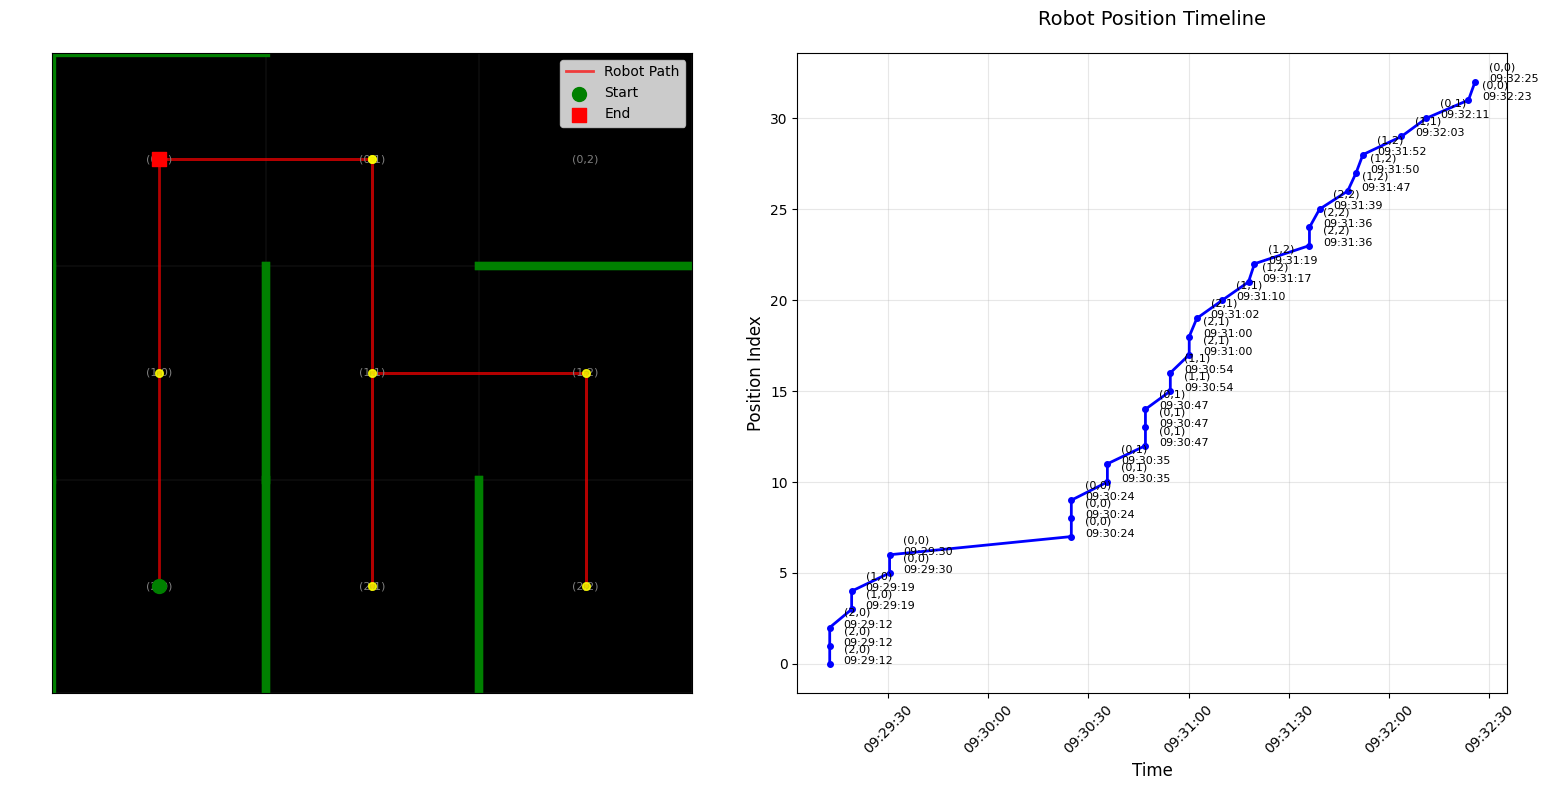


📊 Movement Statistics:
   Total positions logged: 33
   Total duration: 0:03:13.320656
   Start position: [2, 0]
   End position: [0, 0]


In [18]:
# แสดงเส้นทางการเคลื่อนที่ของหุ่นยนต์จากข้อมูล timestamp
plot_robot_movement_path(
    r"D:\downsyndrome\year2_1\Robot_Module_2-1\Assignment\dude\Robot_Position_Timestamps.json",
    r"D:\downsyndrome\year2_1\Robot_Module_2-1\Assignment\dude\Mapping_Top.json"
)
